In [63]:
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
import re

In [6]:
import pandas as pd
data = pd.read_csv('SMSSpamCollection',sep = '\t',names = ['label','message'])


In [8]:
data.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
data.shape

(5572, 2)

In [18]:
data['message'][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [25]:
len(data)   

5572

In [31]:
corpus = []
ps = PorterStemmer()
for i in range(0,len(data)):
    review = re.sub('[^a-zA-Z]',' ',data['message'][i])
    review = review.lower()
    review = review.split()
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [33]:
corpus[0]         #### stemmed words in first sentense

'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'

In [35]:
len(corpus)

5572

In [37]:
y = pd.get_dummies(data['label'],drop_first=True)

In [38]:
y  ############### spam = 1 ,ham =0 -- dependent feature

,spam
0,0
1,0
2,1
3,0
4,0
...,...
5567,1
5568,0
5569,0
5570,0


In [39]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X = cv.fit_transform(corpus).toarray()

In [40]:
X.shape  ### total colums are more than 6000.

(5572, 6296)

In [42]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features= 2000)
X = cv.fit_transform(corpus).toarray()

In [43]:
X.shape

(5572, 2000)

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [46]:
X_train.shape

(3900, 2000)

In [48]:
X_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [49]:
from sklearn.naive_bayes import MultinomialNB
spam_detect_model = MultinomialNB().fit(X_train, y_train)

y_pred=spam_detect_model.predict(X_test)

c:\users\chaitanya mhetre\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [50]:
y_pred

array([0, 0, 0, ..., 0, 1, 0], dtype=uint8)

In [51]:
y_test

,spam
3245,0
944,0
1044,0
2484,0
812,0
...,...
2505,0
2525,1
4975,0
650,1


In [54]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_pred,y_test))

[[1430   10]
 [  18  214]]


In [55]:
spam_detect_model.score(X_train,y_train)

0.9882051282051282

In [56]:
spam_detect_model.score(X_test,y_test)

0.9832535885167464

<AxesSubplot:ylabel='Count'>

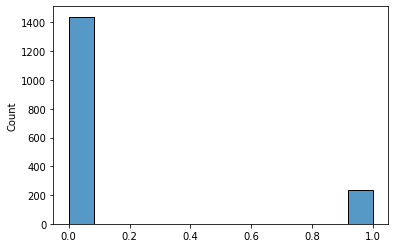

In [59]:
import seaborn as sns
sns.histplot(y_pred)

<AxesSubplot:ylabel='Count'>

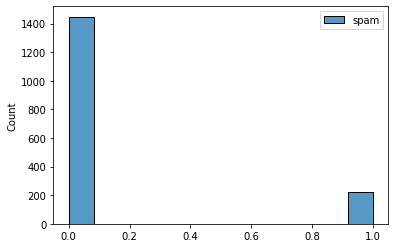

In [60]:
import seaborn as sns
sns.histplot(y_test)

In [64]:
################################## using lemmatization#############################

corpus_lm = []
wl = WordNetLemmatizer()
for i in range(0,len(data)):
    review = re.sub('[^a-zA-Z]',' ',data['message'][i])
    review = review.lower()
    review = review.split()
    review = [wl.lemmatize(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus_lm.append(review)

In [65]:
corpus_lm[0]

'go jurong point crazy available bugis n great world la e buffet cine got amore wat'

In [76]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features= 4000)
X = cv.fit_transform(corpus_lm).toarray()

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

from sklearn.naive_bayes import MultinomialNB
spam_detect_model1 = MultinomialNB().fit(X_train, y_train)

y_pred_lemm=spam_detect_model1.predict(X_test)

c:\users\chaitanya mhetre\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [77]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_pred_lemm,y_test))

[[1427   10]
 [  21  214]]


In [78]:
spam_detect_model1.score(X_train,y_train)

0.99

In [79]:
spam_detect_model1.score(X_test,y_test)

0.9814593301435407

In [ ]:
############## as we are increasing the number of max_featuters in count vectorizer --- accuracy increases